In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import sqlite3 as sl
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
config = load_config_and_check("../config/qfl_v00.yaml")

In [58]:
PATH_TESTED = os.path.join(
    config["experiment_folder"], "programs", "metadata"
)
metadata_files = [
    os.path.join(PATH_TESTED, filename) 
    for filename in os.listdir(PATH_TESTED)
    if not filename.endswith("_exec.json")
]
metadata_files[:10]

['../data/qfl_v00/programs/metadata/fa818cd09710495eac83fd95fd0df81f.json',
 '../data/qfl_v00/programs/metadata/10464be498874b54b8ffbfcdfb15883d.json',
 '../data/qfl_v00/programs/metadata/967c907b92c8432d97f93e9fd54f5ed6.json',
 '../data/qfl_v00/programs/metadata/57d51d2c87f3445092493041cdfa7f5b.json',
 '../data/qfl_v00/programs/metadata/ec0756413779483cafb2b8cbb96d3bfc.json',
 '../data/qfl_v00/programs/metadata/561adeb157af493bb26a9972d31b6552.json',
 '../data/qfl_v00/programs/metadata/f10e1f0a183e42f3b6e1d3df23818b5c.json',
 '../data/qfl_v00/programs/metadata/f7d353f63dba4d68a501e9fc6220f72b.json',
 '../data/qfl_v00/programs/metadata/85f9fe0dd3c84025a7a596e9eab4b322.json',
 '../data/qfl_v00/programs/metadata/2cca7b29228e4b11a093e2bc5e038df6.json']

In [67]:
pd.json_normalize([{
    "program_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
    "qasm": {
        "program_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
        "qasm_filepath": "../data/qfl_v00/programs/qasm/02da8f4d2f1d44a1b741bca2ff7f263d.qasm",
        "n_qubits": 6,
        "n_ops": 184,
        "gate_set": {
            "cx": 3,
            "rx": 1,
            "ry": 1,
            "rz": 1,
            "p": 1
        },
        "strategy_program_generation": "WeightedRandomCircuitGenerator",
        "circuit_id": "02da8f4d2f1d44a1b741bca2ff7f263d",
        "benchmark_name": "seed_42"
    },
    "divergence": {
        "ks": {
            "statistic": 0.0157470703125,
            "p-value": 0.26173011163106014
        }
    },
    "platform_names": [
        "qiskit",
        "cirq"
    ],
    "shots": 8192
}])


,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,02da8f4d2f1d44a1b741bca2ff7f263d,"[qiskit, cirq]",8192,02da8f4d2f1d44a1b741bca2ff7f263d,../data/qfl_v00/programs/qasm/02da8f4d2f1d44a1...,6,184,3,1,1,1,1,WeightedRandomCircuitGenerator,02da8f4d2f1d44a1b741bca2ff7f263d,seed_42,0.015747,0.26173


In [59]:
def pandize(file_list):
    """Create a pandas dataframe with the json file passed."""
    records = []
    for filepaths in tqdm(file_list):
        with open(filepaths, 'r') as in_file:
            data = json.load(in_file)
        records.append(data)
    return pd.json_normalize(records)
    # return pd.DataFrame.from_records(records)
    
df = pandize(file_list=metadata_files)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83954/83954 [03:27<00:00, 404.95it/s]


In [66]:
df_small = pandize(file_list=metadata_files[:1])
df_small.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 276.23it/s]


,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,fa818cd09710495eac83fd95fd0df81f,"[qiskit, cirq]",8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302


In [60]:
df.head()

,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,fa818cd09710495eac83fd95fd0df81f,"[qiskit, cirq]",8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302
1,10464be498874b54b8ffbfcdfb15883d,"[qiskit, cirq]",8192,10464be498874b54b8ffbfcdfb15883d,../data/qfl_v00/programs/qasm/10464be498874b54...,5,32,3,1,1,1,1,WeightedRandomCircuitGenerator,10464be498874b54b8ffbfcdfb15883d,seed_42,0.014771,0.333291
2,967c907b92c8432d97f93e9fd54f5ed6,"[qiskit, cirq]",8192,967c907b92c8432d97f93e9fd54f5ed6,../data/qfl_v00/programs/qasm/967c907b92c8432d...,15,181,3,1,1,1,1,WeightedRandomCircuitGenerator,967c907b92c8432d97f93e9fd54f5ed6,seed_42,0.011597,0.640362
3,57d51d2c87f3445092493041cdfa7f5b,"[qiskit, cirq]",8192,57d51d2c87f3445092493041cdfa7f5b,../data/qfl_v00/programs/qasm/57d51d2c87f34450...,4,72,3,1,1,1,1,WeightedRandomCircuitGenerator,57d51d2c87f3445092493041cdfa7f5b,seed_42,0.008545,0.925945
4,ec0756413779483cafb2b8cbb96d3bfc,"[qiskit, cirq]",8192,ec0756413779483cafb2b8cbb96d3bfc,../data/qfl_v00/programs/qasm/ec0756413779483c...,5,41,3,1,1,1,1,WeightedRandomCircuitGenerator,ec0756413779483cafb2b8cbb96d3bfc,seed_42,0.008911,0.901014


<AxesSubplot:xlabel='divergence.ks.statistic', ylabel='Count'>

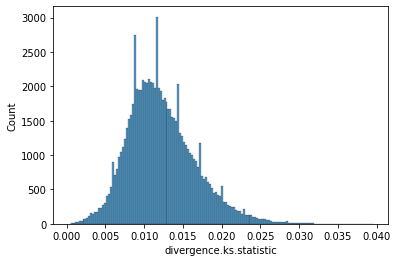

In [61]:
sns.histplot(
    data=df,
    x='divergence.ks.statistic'
)

<AxesSubplot:xlabel='divergence.ks.p-value', ylabel='Count'>

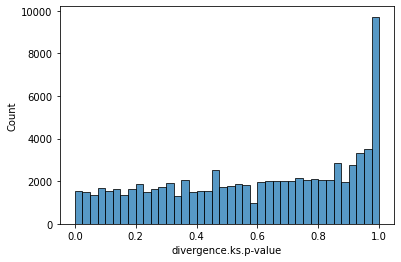

In [62]:
sns.histplot(
    data=df,
    x='divergence.ks.p-value'
)

In [38]:
df[['program_id', 'qasm.n_ops', 'qasm.n_qubits', "divergence.ks.p-value", "divergence.ks.statistic"]].sort_values(by="divergence.ks.p-value")

,program_id,qasm.n_ops,qasm.n_qubits,divergence.ks.p-value,divergence.ks.statistic
59133,5ebce9e92acf432ab4125f8269cfb037,122,17,0.000005,0.039551
25360,523fa7155ba54e7d9fc777fbe394ac12,168,19,0.000031,0.036743
31908,d6f865c85aee492fb299c2eb7ccc9689,37,14,0.000092,0.034912
55299,408a56c7b47e4166bb1007774f18b61b,55,18,0.000092,0.034912
31560,187a9357de3b42b68c16492f992bee8a,194,20,0.000099,0.034790
...,...,...,...,...,...
58605,2c0458f0208f4207a3974fb1d4a443b5,147,2,1.000000,0.002686
36590,dbe08f19e0eb4ab6ade1989a97c77989,98,2,1.000000,0.002441
19064,701a4a8a5a154760ba90251b18ac6f40,176,2,1.000000,0.002563
62625,2de0e73c286f44879891c1aa524954a0,179,2,1.000000,0.002197


## Experiment with SQLITE

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65906 entries, 0 to 65905
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   program_id                        65906 non-null  object 
 1   platform_names                    65906 non-null  object 
 2   shots                             65906 non-null  int64  
 3   qasm.program_id                   65906 non-null  object 
 4   qasm.qasm_filepath                65906 non-null  object 
 5   qasm.n_qubits                     65906 non-null  int64  
 6   qasm.n_ops                        65906 non-null  int64  
 7   qasm.gate_set.cx                  65906 non-null  int64  
 8   qasm.gate_set.rx                  65906 non-null  int64  
 9   qasm.gate_set.ry                  65906 non-null  int64  
 10  qasm.gate_set.rz                  65906 non-null  int64  
 11  qasm.gate_set.p                   65906 non-null  int64  
 12  qasm

In [13]:
import sqlite3 as sl
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)

In [16]:
# create
detector_columns = [c for c in df.columns if c.startswith("divergence.")]
qasm_columns = [c for c in df.columns if c.startswith("qasm.")]
columns_to_save = ['program_id', 'shots'] + qasm_columns + detector_columns
df[columns_to_save].to_sql('DATA', con, if_exists='append')

In [36]:
cur = con.cursor()
table_name = "DATA"
available_tables = cur.execute(f"""
    SELECT tbl_name FROM sqlite_master WHERE type='table'
    AND tbl_name='{table_name}'; 
""").fetchall()

In [37]:
available_tables

[('DATA',)]

In [30]:
# read the existing programs
table_name = "RERUN"
try: 
    present_program_id = pd.read_sql(f'''
        SELECT DISTINCT program_id 
        FROM {table_name}
    ''', con)
except sl.DatabaseError as e:
    print(e)
    present_program_id = []

DatabaseError: Execution failed on sql '
        SELECT DISTINCT program_id 
        FROM RERUN
    ': no such table: RERUN

In [24]:
list(present_program_id["program_id"])

['fa818cd09710495eac83fd95fd0df81f',
 '10464be498874b54b8ffbfcdfb15883d',
 '967c907b92c8432d97f93e9fd54f5ed6',
 '57d51d2c87f3445092493041cdfa7f5b',
 '561adeb157af493bb26a9972d31b6552',
 'f7d353f63dba4d68a501e9fc6220f72b',
 '85f9fe0dd3c84025a7a596e9eab4b322',
 '2cca7b29228e4b11a093e2bc5e038df6',
 '370461ab90614b57baa31c58d15f71df',
 'f2ede802b1284862a8037bbbfb274746',
 '11e9ccc61f7c4eaeb6d28071bbb1ae29',
 '0606fdda239b4ed5a7a9e7e68d33c183',
 'c8c4d09cce5247c7bf18cefcbbdba685',
 'd87be7b26c004c4cbc48df95f8bfccf4',
 'ceb1dec501044e0ca230e918ba138496',
 '7022f8eb289346b2b389f4b446c74c6d',
 'ccd0954a1c9040889aa3cd13369bfb2f',
 'f223ed00465a4410acdeaf309b31f3d5',
 '3609ac949618472bb6857d359999c2cf',
 '3500e0b90b4842c1876f5cc900bef734',
 'c01c5d7b8bba4d9f95d6c1f58282a21a',
 'c2b8e9e0a2af427ca1a08fa8c63f87f1',
 'cfd51249268e489aad7dc4484ba7c3d5',
 'c1f3e54b988448a981935a4c144824f6',
 'e4c2f00b8b3249a0a57c92dc68016e2f',
 '913f568e7fef43a19db2675417a01e52',
 'c0aae7deaff94da882210515826a7ed1',
 

In [56]:
test_name = "ks"
top_k = 10
df_most_divergent = pd.read_sql(f'''
    SELECT program_id, [divergence.{test_name}.statistic], [divergence.{test_name}.p-value] 
    FROM DATA
    ORDER BY
        [divergence.{test_name}.statistic] DESC,
        [divergence.{test_name}.p-value]  ASC
    LIMIT {top_k};
''', con)
#df_most_divergent.columns = [
#    c.replace("'", "") for c in df_most_divergent.columns
#]
list(df_most_divergent["program_id"])

['5ebce9e92acf432ab4125f8269cfb037',
 '523fa7155ba54e7d9fc777fbe394ac12',
 'd6f865c85aee492fb299c2eb7ccc9689',
 '408a56c7b47e4166bb1007774f18b61b',
 '187a9357de3b42b68c16492f992bee8a',
 'af428df6acb04e77998c92dd67b03f37',
 '79270a0342674765b1fa8669e95d7985',
 'b920d97856a04575acba63bd064520b8',
 '2b8cf4d141be4046ad9f38d37b6db4d5',
 'b626ad33fc4440edbfe2e2e2276d6073']

In [49]:
df_back = pd.read_sql(f'''
    SELECT *
    FROM DATA
''', con)
df_back.head()

,index,program_id,platform_names,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,0,fa818cd09710495eac83fd95fd0df81f,None,8192,fa818cd09710495eac83fd95fd0df81f,../data/qfl_v00/programs/qasm/fa818cd09710495e...,9,90,3,1,1,1,1,WeightedRandomCircuitGenerator,fa818cd09710495eac83fd95fd0df81f,seed_42,0.010254,0.782302
1,1,10464be498874b54b8ffbfcdfb15883d,None,8192,10464be498874b54b8ffbfcdfb15883d,../data/qfl_v00/programs/qasm/10464be498874b54...,5,32,3,1,1,1,1,WeightedRandomCircuitGenerator,10464be498874b54b8ffbfcdfb15883d,seed_42,0.014771,0.333291
2,2,967c907b92c8432d97f93e9fd54f5ed6,None,8192,967c907b92c8432d97f93e9fd54f5ed6,../data/qfl_v00/programs/qasm/967c907b92c8432d...,15,181,3,1,1,1,1,WeightedRandomCircuitGenerator,967c907b92c8432d97f93e9fd54f5ed6,seed_42,0.011597,0.640362
3,3,57d51d2c87f3445092493041cdfa7f5b,None,8192,57d51d2c87f3445092493041cdfa7f5b,../data/qfl_v00/programs/qasm/57d51d2c87f34450...,4,72,3,1,1,1,1,WeightedRandomCircuitGenerator,57d51d2c87f3445092493041cdfa7f5b,seed_42,0.008545,0.925945
4,4,561adeb157af493bb26a9972d31b6552,None,8192,561adeb157af493bb26a9972d31b6552,../data/qfl_v00/programs/qasm/561adeb157af493b...,15,96,3,1,1,1,1,WeightedRandomCircuitGenerator,561adeb157af493bb26a9972d31b6552,seed_42,0.017700,0.153537


In [41]:
df_back.columns

Index(['index', 'program_id', 'platform_names', 'shots', 'qasm.program_id',
       'qasm.qasm_filepath', 'qasm.n_qubits', 'qasm.n_ops', 'qasm.gate_set.cx',
       'qasm.gate_set.rx', 'qasm.gate_set.ry', 'qasm.gate_set.rz',
       'qasm.gate_set.p', 'qasm.strategy_program_generation',
       'qasm.circuit_id', 'qasm.benchmark_name', 'divergence.ks.statistic',
       'divergence.ks.p-value'],
      dtype='object')

In [42]:
"divergence.ks.statistic" in df_back.columns

True

In [69]:
import sqlite3 as sl
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)
present_program_id = pd.read_sql(f'''
    SELECT DISTINCT program_id 
    FROM RERUN
''', con)

In [70]:
present_program_id

,program_id
0,5ebce9e92acf432ab4125f8269cfb037


In [74]:
df_most_divergent = pd.read_sql(f'''
    SELECT program_id, [divergence.{test_name}.statistic], [divergence.{test_name}.p-value]
    FROM DATA
    WHERE program_id NOT IN (SELECT DISTINCT program_id FROM RERUN)
    ORDER BY
        [divergence.{test_name}.statistic] DESC,
        [divergence.{test_name}.p-value]  ASC
    LIMIT {top_k};
''', con)

list(df_most_divergent["program_id"])

['523fa7155ba54e7d9fc777fbe394ac12',
 'd6f865c85aee492fb299c2eb7ccc9689',
 '408a56c7b47e4166bb1007774f18b61b',
 '187a9357de3b42b68c16492f992bee8a',
 'af428df6acb04e77998c92dd67b03f37',
 '79270a0342674765b1fa8669e95d7985',
 'b920d97856a04575acba63bd064520b8',
 '1f582f8b1f4b43499240fdedd3766401',
 '2b8cf4d141be4046ad9f38d37b6db4d5',
 'b626ad33fc4440edbfe2e2e2276d6073']

In [82]:
df_all = pd.read_sql(f'''
    SELECT *
    FROM RERUN
''', con)
df_all.groupby(by="program_id").agg({f"divergence.{test_name}.p-value": "mean"})

,divergence.ks.p-value
program_id,
5ebce9e92acf432ab4125f8269cfb037,0.375012


In [87]:
df_all

,index,program_id,rerun_id,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,0,5ebce9e92acf432ab4125f8269cfb037,1ddb06d355664530a9475b6915688bc2,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.013550,0.439613
1,0,5ebce9e92acf432ab4125f8269cfb037,154a50ee139440d4a2c78a3726396bca,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015381,0.287140
2,0,5ebce9e92acf432ab4125f8269cfb037,2c61aec3032149adbaa87206b8452947,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012573,0.536562
3,0,5ebce9e92acf432ab4125f8269cfb037,296c647e9b184b8ba59ab298f6b78a50,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.019043,0.102521
4,0,5ebce9e92acf432ab4125f8269cfb037,3969a46fbfba47568d4c4e5f9337cf00,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012573,0.536562
5,0,5ebce9e92acf432ab4125f8269cfb037,b2fd63a3914a4e688167d8ae09792662,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.011353,0.666714
6,0,5ebce9e92acf432ab4125f8269cfb037,3396c17d0ef04d1797aad3646e4e394d,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015991,0.245729
7,0,5ebce9e92acf432ab4125f8269cfb037,b0c1aba2b13d4a80999bf2c992e7c2d9,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.015747,0.261730
8,0,5ebce9e92acf432ab4125f8269cfb037,a937b99d908e45cab884c47ca40ee2ab,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.022217,0.035070
9,0,5ebce9e92acf432ab4125f8269cfb037,16263f5f34f34fc4adfc457285869b81,5ebce9e92acf432ab4125f8269cfb037,../data/qfl_v00/programs/qasm/5ebce9e92acf432a...,17,122,3,1,1,1,1,WeightedRandomCircuitGenerator,5ebce9e92acf432ab4125f8269cfb037,seed_42,0.012207,0.574957


In [93]:
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
con = sl.connect(DB_PATH)

In [92]:
#Creating a cursor object using the cursor() method
cursor = con.cursor()
cursor.execute("CREATE TABLE RERUN")
#Doping EMPLOYEE table if already exists
#cursor.execute("DROP TABLE RERUN")
#print("Table dropped... ")

#Commit your changes in the database
con.commit()

#Closing the connection
con.close()


OperationalError: incomplete input

## CHECK Real menaces (divergences)

In [4]:
DB_PATH = os.path.join(config['experiment_folder'], "qdd_debugging.db")
test_name = 'ks'

con = sl.connect(DB_PATH)
df_more_reliable_divergence = pd.read_sql(f'''
    SELECT 
        RERUN.program_id, count(RERUN.program_id) as n_reruns, sum(RERUN.shots) as total_shots, 
        DATA.[qasm.n_ops], DATA.[qasm.n_qubits], DATA.[qasm.qasm_filepath],
        avg(RERUN.[divergence.{test_name}.p-value]) as average_pvalue
    FROM RERUN
    JOIN DATA
    ON RERUN.program_id = DATA.[qasm.program_id]
    GROUP BY RERUN.program_id
''', con)
df_sorted_divergence = df_more_reliable_divergence.sort_values(by='average_pvalue')
df_sorted_divergence.head()

,program_id,n_reruns,total_shots,qasm.n_ops,qasm.n_qubits,qasm.qasm_filepath,average_pvalue
5859,3bddecb6d9274309aa90ee5b952a861d,10,81920,128,20,../data/qfl_v00/programs/qasm/3bddecb6d9274309...,0.172295
25075,ff44832ba7dd48448611e0a6f273a610,10,81920,86,12,../data/qfl_v00/programs/qasm/ff44832ba7dd4844...,0.173679
4348,2c3d949de5a1484a9b4cdcfd214ccc09,10,81920,137,19,../data/qfl_v00/programs/qasm/2c3d949de5a1484a...,0.201458
10432,6ab1c5df44964a47b2a9d03c04da1c10,10,81920,108,16,../data/qfl_v00/programs/qasm/6ab1c5df44964a47...,0.202478
10080,6730ecef87ee4692825e51a9682cd53c,10,81920,137,15,../data/qfl_v00/programs/qasm/6730ecef87ee4692...,0.203752


In [17]:
df_all_data = pd.read_sql(f'''
    SELECT *
    FROM DATA
''', con)

In [18]:
len(df_all_data)

452571

In [ ]:
df_all_reruns = pd.read_sql(f'''
    SELECT *
    FROM RERUN
''', con)

In [21]:
df_all_data = df_all_reruns.sort_values(by=f"divergence.{test_name}.p-value")
df_all_data.head(15)

,index,program_id,rerun_id,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
120707,0,d28a0a2842ab4556b73cfb23471674a8,5d7e00955f124c8bb606540e793c41ce,8192,d28a0a2842ab4556b73cfb23471674a8,../data/qfl_v00/programs/qasm/d28a0a2842ab4556...,17,193,3,1,1,1,1,WeightedRandomCircuitGenerator,d28a0a2842ab4556b73cfb23471674a8,seed_42,0.040039,0.000004
81842,0,1c516d457ea54ff39e4296d4da3d89d8,2a68863307e946708a6dbcca12177376,8192,1c516d457ea54ff39e4296d4da3d89d8,../data/qfl_v00/programs/qasm/1c516d457ea54ff3...,6,93,3,1,1,1,1,WeightedRandomCircuitGenerator,1c516d457ea54ff39e4296d4da3d89d8,seed_42,0.039673,0.000005
135292,0,56cbadd6b2bf401b8250218fd0c55b1f,8e5535f111c8465386585a881c6217a6,8192,56cbadd6b2bf401b8250218fd0c55b1f,../data/qfl_v00/programs/qasm/56cbadd6b2bf401b...,7,129,3,1,1,1,1,WeightedRandomCircuitGenerator,56cbadd6b2bf401b8250218fd0c55b1f,seed_42,0.039551,0.000005
251042,0,49473e2b38e6496a93b409d36bfff18c,219d650eba2e4413a937a5de07f56133,8192,49473e2b38e6496a93b409d36bfff18c,../data/qfl_v00/programs/qasm/49473e2b38e6496a...,7,125,3,1,1,1,1,WeightedRandomCircuitGenerator,49473e2b38e6496a93b409d36bfff18c,seed_42,0.039307,0.000006
116155,0,ce09d2f436d14c01a57fa0b42a30bbf3,b976b805face4c63a8b809b715df7fb2,8192,ce09d2f436d14c01a57fa0b42a30bbf3,../data/qfl_v00/programs/qasm/ce09d2f436d14c01...,15,190,3,1,1,1,1,WeightedRandomCircuitGenerator,ce09d2f436d14c01a57fa0b42a30bbf3,seed_42,0.038330,0.000012
141623,0,dcc6b464736f465d91658fce6092175f,cbb8b4c62abf4b6c9deb993e9dee1490,8192,dcc6b464736f465d91658fce6092175f,../data/qfl_v00/programs/qasm/dcc6b464736f465d...,16,112,3,1,1,1,1,WeightedRandomCircuitGenerator,dcc6b464736f465d91658fce6092175f,seed_42,0.037720,0.000017
83607,0,faf8e294c57f412da7f4ac8f367f77a1,89e72ee5069347cdb3a5364f9e0f9db1,8192,faf8e294c57f412da7f4ac8f367f77a1,../data/qfl_v00/programs/qasm/faf8e294c57f412d...,14,141,3,1,1,1,1,WeightedRandomCircuitGenerator,faf8e294c57f412da7f4ac8f367f77a1,seed_42,0.037354,0.000022
250248,0,d59d7b16241f4f8cbc62169c4bf674b2,a62c01ff82b543e3b01501f846d6980c,8192,d59d7b16241f4f8cbc62169c4bf674b2,../data/qfl_v00/programs/qasm/d59d7b16241f4f8c...,17,131,3,1,1,1,1,WeightedRandomCircuitGenerator,d59d7b16241f4f8cbc62169c4bf674b2,seed_42,0.037231,0.000023
194983,0,102f4184344a44f98e410f7ee41587a8,ecd06d78b6ca4228bfcf7ad69f9b6e8e,8192,102f4184344a44f98e410f7ee41587a8,../data/qfl_v00/programs/qasm/102f4184344a44f9...,10,193,3,1,1,1,1,WeightedRandomCircuitGenerator,102f4184344a44f98e410f7ee41587a8,seed_42,0.037109,0.000025
97048,0,2d94eaea96f7413591c00674407779a0,d4af2fffdbce4340972eee0aed155ff3,8192,2d94eaea96f7413591c00674407779a0,../data/qfl_v00/programs/qasm/2d94eaea96f74135...,17,135,3,1,1,1,1,WeightedRandomCircuitGenerator,2d94eaea96f7413591c00674407779a0,seed_42,0.036987,0.000027


In [20]:
p_value_bonferroni = 0.05 / (len(df_all_data))
print(f"p_value_bonferroni: {p_value_bonferroni}")

p_value_bonferroni: 1.988862370723946e-07


In [22]:
df_all_data[df_all_data["divergence.ks.p-value"] < p_value_bonferroni]

,index,program_id,rerun_id,shots,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value


In [11]:
df_sorted_divergence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25127 entries, 5859 to 16670
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   program_id          25127 non-null  object 
 1   n_reruns            25127 non-null  int64  
 2   total_shots         25127 non-null  int64  
 3   qasm.n_ops          25127 non-null  int64  
 4   qasm.n_qubits       25127 non-null  int64  
 5   qasm.qasm_filepath  25127 non-null  object 
 6   average_pvalue      25127 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.5+ MB


In [9]:
def print_content(filepath):
    with open(filepath, 'r') as in_file:
        content = in_file.read()
    print("-" * 80)
    print(os.path.basename(filepath))
    print("-" * 80)
    print(content)
    print("-" * 80)
    
def print_distrib_reruns(df, program_id, test_name='ks'):
    df_single = df[df['program_id'] == program_id]
    sns.histplot(
        data=df_single,
        x=f"divergence.{test_name}.p-value",
        bins=10
    )
    plt.ylim(0,10)
    plt.xlim(0,1)
    plt.title(f"Program id: {program_id}")
    plt.show()

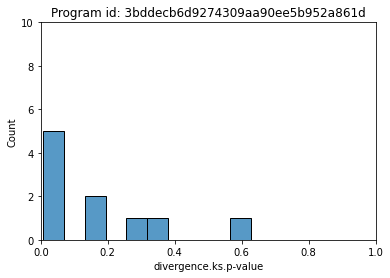

--------------------------------------------------------------------------------
3bddecb6d9274309aa90ee5b952a861d.qasm
--------------------------------------------------------------------------------
OPENQASM 2.0;
include "qelib1.inc";
qreg q[20];
creg c[20];
cx q[19], q[13];
ry(0.9801424781769557) q[3];
cx q[17], q[11];
ry(6.094123332392967) q[0];
rz(1.1424399624340646) q[4];
cx q[6], q[10];
rx(3.844385118274953) q[5];
cx q[5], q[7];
rx(1.2545873742863833) q[15];
rx(0.29185655071471744) q[11];
ry(0.4087312132537349) q[3];
U(0,5.0793103400482895,0) q[19];
cx q[1], q[14];
rx(3.1112882860657196) q[2];
cx q[18], q[4];
ry(3.267683749398383) q[6];
rx(6.092079887237463) q[3];
rz(5.622366060669442) q[18];
ry(0.55601478868818) q[18];
cx q[0], q[7];
cx q[5], q[16];
cx q[5], q[11];
cx q[16], q[1];
U(0,1.24856745052169,0) q[15];
cx q[16], q[13];
rz(0.465236267850866) q[15];
cx q[2], q[17];
ry(0.39934889266571716) q[6];
cx q[6], q[14];
ry(2.9670138796084675) q[17];
cx q[14], q[15];
rx(3.1026092358

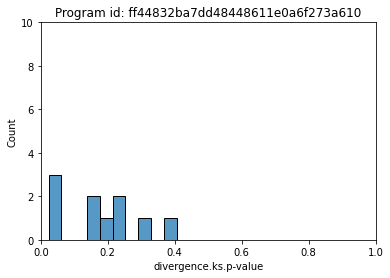

--------------------------------------------------------------------------------
ff44832ba7dd48448611e0a6f273a610.qasm
--------------------------------------------------------------------------------
OPENQASM 2.0;
include "qelib1.inc";
qreg q[12];
creg c[12];
cx q[11], q[8];
ry(0.9801424781769557) q[1];
cx q[10], q[6];
ry(6.094123332392967) q[0];
rz(1.1424399624340646) q[2];
cx q[3], q[6];
rx(3.844385118274953) q[3];
cx q[3], q[5];
rx(1.2545873742863833) q[9];
rx(0.29185655071471744) q[7];
ry(0.4087312132537349) q[2];
U(0,5.0793103400482895,0) q[11];
cx q[1], q[8];
rx(3.1112882860657196) q[1];
cx q[10], q[2];
ry(3.267683749398383) q[3];
rx(6.092079887237463) q[2];
rz(5.622366060669442) q[11];
ry(0.55601478868818) q[11];
cx q[0], q[4];
cx q[3], q[10];
cx q[3], q[6];
cx q[9], q[0];
U(0,1.24856745052169,0) q[9];
cx q[9], q[7];
rz(0.465236267850866) q[9];
cx q[1], q[10];
ry(0.39934889266571716) q[3];
cx q[3], q[9];
ry(2.9670138796084675) q[10];
cx q[8], q[9];
rx(3.1026092358267214) q[9];
r

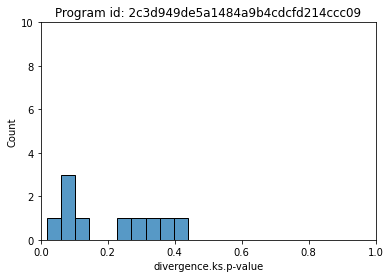

--------------------------------------------------------------------------------
2c3d949de5a1484a9b4cdcfd214ccc09.qasm
--------------------------------------------------------------------------------
OPENQASM 2.0;
include "qelib1.inc";
qreg q[19];
creg c[19];
cx q[18], q[13];
ry(0.9801424781769557) q[2];
cx q[16], q[10];
ry(6.094123332392967) q[0];
rz(1.1424399624340646) q[4];
cx q[5], q[10];
rx(3.844385118274953) q[5];
cx q[5], q[7];
rx(1.2545873742863833) q[14];
rx(0.29185655071471744) q[11];
ry(0.4087312132537349) q[3];
U(0,5.0793103400482895,0) q[18];
cx q[1], q[13];
rx(3.1112882860657196) q[2];
cx q[17], q[4];
ry(3.267683749398383) q[5];
rx(6.092079887237463) q[3];
rz(5.622366060669442) q[17];
ry(0.55601478868818) q[17];
cx q[0], q[6];
cx q[5], q[15];
cx q[5], q[10];
cx q[15], q[1];
U(0,1.24856745052169,0) q[14];
cx q[15], q[12];
rz(0.465236267850866) q[14];
cx q[2], q[16];
ry(0.39934889266571716) q[6];
cx q[6], q[14];
ry(2.9670138796084675) q[16];
cx q[13], q[14];
rx(3.1026092358

In [12]:
TOP_K = 3
for i, row in df_sorted_divergence.iloc[:TOP_K].iterrows():
    print_distrib_reruns(df_all_reruns, row['program_id'])
    print_content(row['qasm.qasm_filepath'])

In [20]:
df_all_data = pd.read_sql(f'''
    SELECT DISTINCT program_id
    FROM DATA
''', con)
len(df_all_data)

174363

## Statistic and P-value are monotonically correlated

<AxesSubplot:xlabel='divergence.ks.statistic', ylabel='divergence.ks.p-value'>

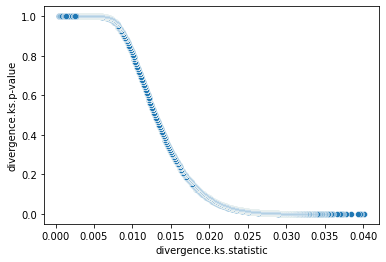

In [16]:
sns.scatterplot(
    data=df_all_reruns,
    x='divergence.ks.statistic',
    y='divergence.ks.p-value'
)

## Bonferroni (as sample size increases)

In [25]:
import numpy as np
exp = np.arange(10)
base = np.array([10] * 10)
base ** exp

array([         1,         10,        100,       1000,      10000,
           100000,    1000000,   10000000,  100000000, 1000000000])

In [36]:
def func_bonf(pval, sample_size):
    return pval / sample_size

def func_sidak(pval, sample_size):
    return 1 - ((1 - pval) ** (float(1) / sample_size))

In [48]:
base_pval = 0.05

# sample_size = base ** exp
sample_size = np.arange(1, 100000, 10000)

corrected_bonferroni = [func_bonf(base_pval, ss) for ss in sample_size]
corrected_sidak = [func_sidak(base_pval, ss) for ss in sample_size]

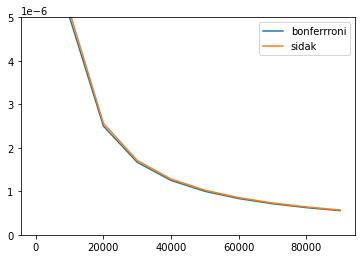

In [50]:
plt.plot(sample_size, corrected_bonferroni, label='bonferrroni')
plt.plot(sample_size, corrected_sidak, label='sidak')
plt.legend()
plt.ylim(0, base_pval/10000)
plt.show()

In [52]:
func_bonf(pval=0.01, sample_size=1000)

1e-05

# V01

In [15]:
config = load_config_and_check("../config/qfl_v01.yaml")

In [16]:
from utils_db import get_database_connection

In [27]:
con = get_database_connection(config, "qfl.db")

df = pd.read_sql("""SELECT * FROM QFLDATA""", con)

(0.0, 0.01)

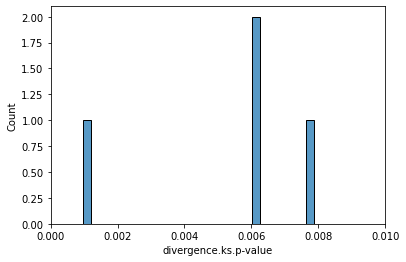

In [28]:
MAX_VISIBLE = .01
df_serious_cases = df[df['divergence.ks.p-value'] <= MAX_VISIBLE]
ax = sns.histplot(
    data=df_serious_cases,
    x='divergence.ks.p-value',
    bins=30
)
ax.set_xlim(0, MAX_VISIBLE)

## Reurn a program

In [32]:
from qfl import execute_qasm_program
from qfl import detect_divergence
from qdd import get_qasm_metadata

In [29]:
PATH_QASM = "../data/qfl_v01/programs/3be2eee1e4864179b3c0784a375c51d8.qasm"
print(PATH_QASM)



../data/qfl_v01/programs/3be2eee1e4864179b3c0784a375c51d8.qasm


In [34]:
program_id = "3be2eee1e4864179b3c0784a375c51d8"
max_runs_per_suspect_bug = 10

metadata_qasm = get_qasm_metadata(config, program_id)
records= []

for i in range(max_runs_per_suspect_bug):
    print(f"Execution iteration {i}", end=" - ")
    exec_metadata = execute_qasm_program(
        config, program_id, metadata_qasm)
    div_metadata = detect_divergence(exec_metadata, detectors=config["detectors"])
    all_metadata = {'qasm': metadata_qasm, 'exec': exec_metadata, 'divergence': div_metadata}
    records.append(all_metadata)
    

Reading: 3be2eee1e4864179b3c0784a375c51d8
Execution iteration 0 - Execution iteration 1 - Execution iteration 2 - Execution iteration 3 - Execution iteration 4 - Execution iteration 5 - Execution iteration 6 - Execution iteration 7 - Execution iteration 8 - Execution iteration 9 - 

In [35]:
df_reruns = pd.json_normalize(records)
df_reruns.head()

,qasm.program_id,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set.cx,qasm.gate_set.rx,qasm.gate_set.ry,qasm.gate_set.rz,qasm.gate_set.p,qasm.strategy_program_generation,...,exec.res_B.000110,exec.res_B.110111,exec.res_B.000111,exec.res_B.101111,exec.platform_B,exec.profile_output,exec.profile_function_calls,exec.profile_time,divergence.ks.statistic,divergence.ks.p-value
0,3be2eee1e4864179b3c0784a375c51d8,../data/qfl_v01/programs/qasm/3be2eee1e4864179...,6,168,3,1,1,1,1,WeightedRandomCircuitGenerator,...,20,24,8,12,cirq,1245792 function calls (1230170 primi...,"[/qiskit/execute_function.py:39(execute), /qis...",1.619,0.015015,0.314258
1,3be2eee1e4864179b3c0784a375c51d8,../data/qfl_v01/programs/qasm/3be2eee1e4864179...,6,168,3,1,1,1,1,WeightedRandomCircuitGenerator,...,17,26,14,11,cirq,779794 function calls (771796 primiti...,"[/qiskit/execute_function.py:39(execute), /qis...",0.643,0.016602,0.208926
2,3be2eee1e4864179b3c0784a375c51d8,../data/qfl_v01/programs/qasm/3be2eee1e4864179...,6,168,3,1,1,1,1,WeightedRandomCircuitGenerator,...,10,21,6,14,cirq,779794 function calls (771796 primiti...,"[/qiskit/execute_function.py:39(execute), /qis...",0.654,0.021484,0.045585
3,3be2eee1e4864179b3c0784a375c51d8,../data/qfl_v01/programs/qasm/3be2eee1e4864179...,6,168,3,1,1,1,1,WeightedRandomCircuitGenerator,...,15,24,9,12,cirq,779794 function calls (771796 primiti...,"[/qiskit/execute_function.py:39(execute), /qis...",0.766,0.016357,0.223107
4,3be2eee1e4864179b3c0784a375c51d8,../data/qfl_v01/programs/qasm/3be2eee1e4864179...,6,168,3,1,1,1,1,WeightedRandomCircuitGenerator,...,15,20,3,12,cirq,779794 function calls (771796 primiti...,"[/qiskit/execute_function.py:39(execute), /qis...",0.643,0.011719,0.627198


<AxesSubplot:xlabel='divergence.ks.p-value', ylabel='Count'>

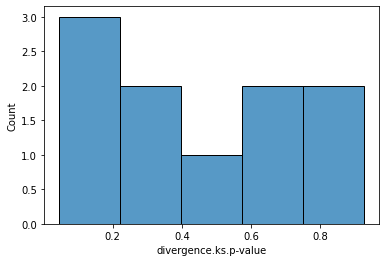

In [36]:
sns.histplot(
    data=df_reruns,
    x="divergence.ks.p-value"
)

# Adjusted P-Value for Multiple Comparison

## Benjamini–Hochberg procedure

In [3]:
from utils_db import get_database_connection
config = load_config_and_check("../config/qfl_v04.yaml")

In [4]:
import sqlite3 as sl

con = get_database_connection(config, "qfl.db")

df_qfl_data = pd.read_sql("""
    SELECT * FROM QFLDATA
""", con)

In [5]:
df_qfl_data.head()

,index,program_id,platform_names,shots,qasm.program_id,qasm.selected_gate_set,qasm.qasm_filepath,qasm.n_qubits,qasm.n_ops,qasm.gate_set,qasm.strategy_program_generation,qasm.circuit_id,qasm.benchmark_name,divergence.ks.statistic,divergence.ks.p-value
0,0,e195f152f21f4ec39f9c32b9ba62a561,"['qiskit', 'cirq']",692,e195f152f21f4ec39f9c32b9ba62a561,"['ccx', 'z', 'u1', 'cswap', 's', 'ch', 'ry', '...",../data/qfl_v04/programs/qasm/e195f152f21f4ec3...,4,0,"['ccx', 'z', 'u1', 'cswap', 's', 'ch', 'ry', '...",OmniGateCircuitGenerator,e195f152f21f4ec39f9c32b9ba62a561,seed_42,0.000000,1.000000
1,0,441d518ff9cb431a8bc37f5933960e90,"['qiskit', 'cirq']",3919,441d518ff9cb431a8bc37f5933960e90,"['tdg', 'cz', 'swap', 'rz', 'ccx', 'cswap', 'u...",../data/qfl_v04/programs/qasm/441d518ff9cb431a...,9,7,"['tdg', 'cz', 'swap', 'rz', 'ccx', 'cswap', 'u...",OmniGateCircuitGenerator,441d518ff9cb431a8bc37f5933960e90,seed_42,0.008165,0.999453
2,0,68f782675e704283b43a7c1ca896c9aa,"['qiskit', 'cirq']",2771,68f782675e704283b43a7c1ca896c9aa,"['h', 'cswap', 'swap', 'u3', 't', 'cx', 'cy', ...",../data/qfl_v04/programs/qasm/68f782675e704283...,8,4,"['h', 'cswap', 'swap', 'u3', 't', 'cx', 'cy', ...",OmniGateCircuitGenerator,68f782675e704283b43a7c1ca896c9aa,seed_42,0.000000,1.000000
3,0,e56c96c20f4143fea75560202c7faa24,"['qiskit', 'cirq']",692,e56c96c20f4143fea75560202c7faa24,"['u3', 'id', 'z', 'rx', 'cswap', 'u2', 'rz', '...",../data/qfl_v04/programs/qasm/e56c96c20f4143fe...,4,21,"['u3', 'id', 'z', 'rx', 'cswap', 'u2', 'rz', '...",OmniGateCircuitGenerator,e56c96c20f4143fea75560202c7faa24,seed_42,0.020231,0.998923
4,0,3e54a6eb09dd40c38b3dd9533ebe1e93,"['qiskit', 'cirq']",88680,3e54a6eb09dd40c38b3dd9533ebe1e93,"['y', 'cx', 'ch', 'u2', 'h', 'cswap', 'rz', 't...",../data/qfl_v04/programs/qasm/3e54a6eb09dd40c3...,18,2,"['y', 'cx', 'ch', 'u2', 'h', 'cswap', 'rz', 't...",OmniGateCircuitGenerator,3e54a6eb09dd40c38b3dd9533ebe1e93,seed_42,0.000023,1.000000


In [6]:
pvals = sorted(df_qfl_data["divergence.ks.p-value"])
ordinal_idx = range(1, len(pvals) + 1)

alpha = 0.5 #config["divergence_alpha_level"]
m = len(pvals)

slope = alpha / m
slope_line = [slope * x for x in ordinal_idx]

Fixed False Discovery Rate at 50.0% [experiment: ../data/qfl_v04/]


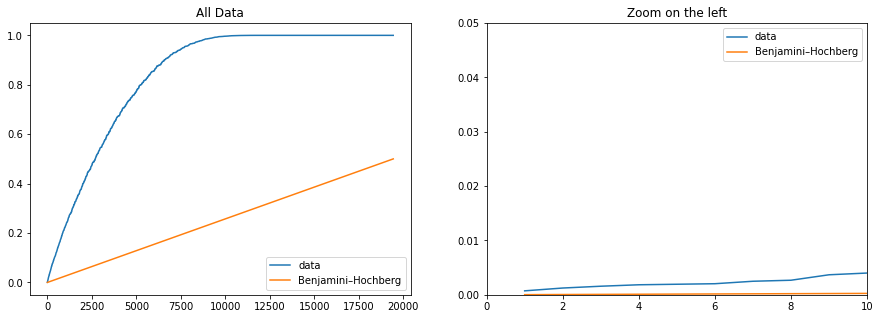

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax_normal = axes[0]
ax_zoom = axes[1]

ax_normal.plot(ordinal_idx, pvals, label='data')
ax_normal.plot(ordinal_idx, slope_line, label="Benjamini–Hochberg")
ax_normal.set_title("All Data")
ax_normal.legend()

ax_zoom.plot(ordinal_idx, pvals, label='data')
ax_zoom.plot(ordinal_idx, slope_line, label="Benjamini–Hochberg")
ax_zoom.set_title("Zoom on the left")
ax_zoom.set_xlim(0, 10)
ax_zoom.set_ylim(0, 0.05)
ax_zoom.legend()

print(f"Fixed False Discovery Rate at {alpha*100}% [experiment: {config['experiment_folder']}]")

In [8]:
pvals[0] < slope_line[0]
print(f"Lowest p-value ({pvals[0]}) vs lowest threshold ({slope_line[0]}):\n"
      f"Is divergent? {pvals[0] < slope_line[0]}")

Lowest p-value (0.0007291749679981068) vs lowest threshold (2.5720164609053497e-05):
Is divergent? False


In [19]:
def read_qasm(pval: float, df: pd.DataFrame, test_name: str = "ks"):
    """Print the qasm associated to the given pvalue. """
    df = df[df[f"divergence.{test_name}.p-value"] == pval]
    program_id = df.iloc[0]["program_id"]
    qasm_path = df.iloc[0]["qasm.qasm_filepath"]
    print(f"Program ID: {program_id}")
    print(open(qasm_path, 'r').read())
    
read_qasm(pval=pvals[0], df=df_qfl_data, test_name="ks")

Program ID: 63fcd45e557246779391b3d8b439224d
OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
creg c[6];
h q[1];
u2(4.947297864148717,4.603143302218958) q[0];
y q[0];
h q[5];
s q[1];
u2(0.621789799868542,4.7865755895247215) q[4];
z q[3];
id q[2];
u2(2.0037826358920743,3.8320830722640276) q[5];
h q[2];
z q[5];
id q[5];
h q[1];
y q[3];
s q[4];
u2(1.335856962386308,0.2031019195399464) q[0];
y q[0];
z q[3];
t q[3];
z q[5];
measure q -> c;



# Minimize a Program

In [24]:
df_qfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62303 entries, 0 to 62302
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             62303 non-null  int64  
 1   program_id                        62303 non-null  object 
 2   platform_names                    62303 non-null  object 
 3   shots                             62303 non-null  int64  
 4   qasm.program_id                   62303 non-null  object 
 5   qasm.selected_gate_set            62303 non-null  object 
 6   qasm.qasm_filepath                62303 non-null  object 
 7   qasm.n_qubits                     62303 non-null  int64  
 8   qasm.n_ops                        62303 non-null  int64  
 9   qasm.gate_set                     62303 non-null  object 
 10  qasm.strategy_program_generation  62303 non-null  object 
 11  qasm.circuit_id                   62303 non-null  object 
 12  qasm

In [33]:
# get minimal example
test_name = config["divergence_primary_test"]
pval_col = f"divergence.{test_name}.p-value"
df_sorted_qfl_data = df_qfl_data.sort_values(by=pval_col)

<AxesSubplot:xlabel='qasm.n_ops', ylabel='Count'>

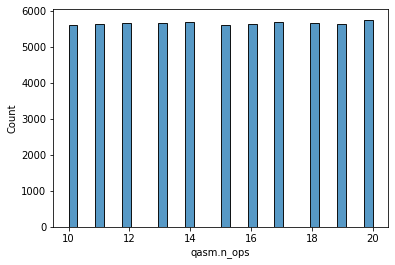

In [34]:
sns.histplot(
    data=df_sorted_qfl_data,
    x="qasm.n_ops"
)

In [38]:
thresholds = []
alpha = 0.05
m = len(df_sorted_qfl_data)
for i, (idx, row) in enumerate(df_sorted_qfl_data.iterrows()):
    
    #print(row[f"divergence.{test_name}.p-value"])
    current_threshold = (alpha / m) * i
    thresholds.append(current_threshold)
    
df_sorted_qfl_data["threshold_bh"] = thresholds

In [40]:
df_sorted_qfl_data['raise_alarm'] = df_sorted_qfl_data.apply(
    lambda row: row[pval_col] < row['threshold_bh'],
    axis=1
)

## Most Divergent (short) Program

In [121]:
df_alarms = df_sorted_qfl_data[df_sorted_qfl_data["raise_alarm"]]
df_alarms = df_alarms.sort_values(by=["qasm.n_ops", "qasm.n_qubits", pval_col])
df_alarms = df_alarms[(
    ~df_alarms["qasm.selected_gate_set"].str.contains("u1") &
    ~df_alarms["qasm.selected_gate_set"].str.contains("u3") &
    ~df_alarms["qasm.selected_gate_set"].str.contains("swap") &
    ~df_alarms["qasm.selected_gate_set"].str.contains("s") &
    ~df_alarms["qasm.selected_gate_set"].str.contains("t") 
)]
first_path = df_alarms.iloc[0]["qasm.qasm_filepath"]
first_content = open(first_path, 'r').read()

first_exec = "../data/qfl_v03/programs/metadata/" + df_alarms.iloc[0]["program_id"] + "_exec.json"
with open(first_exec, 'r') as json_file:
    first_exec_content = json.load(json_file)
print(first_content)
print(list(first_exec_content.keys()))


OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
rx(3.1463635881279752) q[3];
rx(4.384332015710091) q[2];
id q[1];
u2(5.418898672048417,4.45289138440949) q[2];
z q[3];
x q[2];
rx(0.3986114648909356) q[4];
id q[1];
z q[2];
id q[2];
measure q -> c;

['res_A', 'platform_A', 'res_B', 'platform_B', 'profile_output', 'profile_function_calls', 'profile_time']


In [123]:
# QISKIT
print(first_exec_content["platform_A"])
first_exec_content["res_A"]

qiskit


{'01100': 31, '01000': 909, '11000': 39}

In [124]:
#CIRQ
print(first_exec_content["platform_B"])
first_exec_content["res_B"]

cirq


{'01100': 857, '11100': 31, '01000': 85, '11000': 6}

## Manual Program

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

QASM_PATH = "stub_files/bug_mirage_3_Feb_22.qasm"
QASM_CONTENT = open(QASM_PATH, 'r').read()
print(QASM_CONTENT)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
creg c[5];
x q[1];
y q[3];
id q[3];
y q[4];
y q[0];
t q[3];
rx(2.713990594641554) q[1];
h q[0];
ry(4.933406064175189) q[0];
z q[1];
u2(2.8305702808704267,0.08334620905998126) q[4];
h q[2];
u1(1.5144076667907493) q[4];
rz(1.0892822437043135) q[4];
u1(1.9585384533701249) q[2];
rz(5.292231320196365) q[0];
u1(3.756716362028796) q[4];
u2(2.442131435811337,1.7049362495591496) q[2];
t q[1];
rx(5.040352282937607) q[1];
measure q -> c;


## Rerun Cirq (Qconvert)

In [25]:
import cirq
import numpy as np
from functools import reduce

def u1(p_lambda):
    return cirq.MatrixGate(np.array([[1, 0], [0, np.exp(1j*p_lambda)]]))

def u2(p_phi, p_lambda):
    return cirq.MatrixGate(np.array([[1/np.sqrt(2), -np.exp(1j*p_lambda)*1/np.sqrt(2)], [np.exp(1j*p_phi)*1/np.sqrt(2), np.exp(1j*p_lambda+1j*p_phi)*1/np.sqrt(2)]]))

q = [cirq.NamedQubit('q' + str(i)) for i in range(5)]

circuit = cirq.Circuit(
    cirq.Y(q[0]),
    cirq.X(q[1]),
    cirq.H(q[2]),
    cirq.Y(q[3]),
    cirq.Y(q[4]),
    cirq.H(q[0]),
    cirq.rx(2.713990594641554)(q[1]),
    u1(1.9585384533701249)(q[2]),
    cirq.I(q[3]),
    u2(0.08334620905998126, 0.08334620905998126)(q[4]),
    cirq.ry(4.933406064175189)(q[0]),
    cirq.Z(q[1]),
    u2(1.7049362495591496, 1.7049362495591496)(q[2]),
    cirq.T(q[3]),
    u1(1.5144076667907493)(q[4]),
    cirq.rz(5.292231320196365)(q[0]),
    cirq.T(q[1]),
    cirq.rz(1.0892822437043135)(q[4]),
    cirq.rx(5.040352282937607)(q[1]),
    u1(3.756716362028796)(q[4]),
    cirq.measure(q[0], key='c0'),
    cirq.measure(q[1], key='c1'),
    cirq.measure(q[2], key='c2'),
    cirq.measure(q[3], key='c3'),
    cirq.measure(q[4], key='c4')
)

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=8192)
result_dict = dict(result.multi_measurement_histogram(keys=['c0', 'c1', 'c2', 'c3', 'c4']))
keys = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1]), result_dict.keys()))
counts_cirq_qconvert = dict(zip(keys,[value for value in result_dict.values()]))
#sort 
counts_cirq_qconvert = dict(
    sorted(counts_cirq_qconvert.items(), key=lambda item: item[1], reverse=True))
counts_cirq_qconvert

{'01001': 2998,
 '11001': 2924,
 '01011': 832,
 '11011': 829,
 '01101': 201,
 '11101': 185,
 '11111': 59,
 '01111': 55,
 '11000': 43,
 '01000': 38,
 '01010': 12,
 '11010': 10,
 '11100': 3,
 '11110': 2,
 '01110': 1}

## Rerun Cirq (qasm contrib)

In [26]:
import cirq
from cirq.contrib.qasm_import import circuit_from_qasm
import re
from functools import reduce

qc_cirq = circuit_from_qasm(QASM_CONTENT)
simulator = cirq.Simulator()
result = simulator.run(qc_cirq, repetitions=8192)

print(qc_cirq)

measurement_keys = sorted(list(qc_cirq.all_measurement_key_names()))
print(measurement_keys)
result_dict = dict(result.multi_measurement_histogram(keys=measurement_keys))
keys = list(map(lambda arr: reduce(lambda x, y: str(x) + str(y), arr[::-1]), result_dict.keys()))
counts_cirq_contrib = dict(zip(keys,[value for value in result_dict.values()]))

#sort 
counts_cirq_contrib = dict(
    sorted(counts_cirq_contrib.items(), key=lambda item: item[1], reverse=True))
counts_cirq_contrib

q_0: ───Y───H─────────────────────────────────────────────────────────────────────────────────────────────────Ry(1.57π)────────────────────────────────────────────────────────────────────────────────────────Rz(1.69π)────M('c_0')──────────────────────────────────────────────────────────────────────────────────

q_1: ───X───Rx(0.864π)────────────────────────────────────────────────────────────────────────────────────────Z────────────────────────────────────────────────────────────────────────────────────────────────T────────────Rx(1.6π)───────────────────────────────────────────────────────────────────────M('c_1')───

q_2: ───H───cirq.circuits.qasm_output.QasmUGate(theta=0, phi=0, lmda=0.6234221521788219)──────────────────────cirq.circuits.qasm_output.QasmUGate(theta=0.5, phi=0.777354579378964, lmda=0.5426980635477918)───M('c_2')───────────────────────────────────────────────────────────────────────────────────────────────

q_3: ───Y───I───────────────────────────────────────────────────

{'01001': 3006,
 '11001': 2971,
 '01011': 860,
 '11011': 736,
 '11101': 235,
 '01101': 176,
 '01111': 56,
 '11111': 46,
 '11000': 40,
 '01000': 32,
 '11010': 15,
 '01010': 11,
 '11100': 4,
 '11110': 2,
 '01100': 1,
 '01110': 1}

## Rerun Cirq (QFL tket interface)

In [59]:
from tket_interface import run_cirq, convert_and_execute_qiskit_and_cirq_via_tket

In [60]:
qc_cirq = circuit_from_qasm(QASM_CONTENT)

In [61]:
res = convert_and_execute_qiskit_and_cirq_via_tket(
    qasm_path=QASM_PATH, shots=8192
)
res.keys()

0: ───Y───H─────────────────────────────────────────────────────────────────────────────────────────────────Ry(1.57π)────────────────────────────────────────────────────────────────────────────────────────Rz(1.69π)────M('c[0]')──────────────────────────────────────────────────────────────────────────────────

1: ───X───Rx(0.864π)────────────────────────────────────────────────────────────────────────────────────────Z────────────────────────────────────────────────────────────────────────────────────────────────T────────────Rx(1.6π)───────────────────────────────────────────────────────────────────────M('c[1]')───

2: ───H───cirq.circuits.qasm_output.QasmUGate(theta=0, phi=0, lmda=0.6234221521788219)──────────────────────cirq.circuits.qasm_output.QasmUGate(theta=0.5, phi=0.777354579378964, lmda=0.5426980635477918)───M('c[2]')───────────────────────────────────────────────────────────────────────────────────────────────

3: ───Y───I────────────────────────────────────────────────────────

dict_keys(['qiskit', 'cirq', 'profile_output', 'profile_function_calls', 'profile_n_function_calls', 'profile_time'])

In [62]:
counts_cirq_tket = res["cirq"]
# sorted
counts_cirq_tket = dict(
    sorted(counts_cirq_tket.items(), key=lambda item: item[1], reverse=True))
counts_cirq_tket

{'11001': 2995,
 '01001': 2929,
 '01011': 839,
 '11011': 799,
 '01101': 210,
 '11101': 209,
 '01111': 56,
 '11111': 56,
 '01000': 44,
 '11000': 37,
 '11010': 8,
 '01010': 7,
 '01100': 1,
 '11110': 1,
 '11100': 1}

In [63]:
counts_qiskit_tket = res["qiskit"]
# sorted
counts_qiskit_tket = dict(
    sorted(counts_qiskit_tket.items(), key=lambda item: item[1], reverse=True))
counts_qiskit_tket

{'11001': 2975,
 '01001': 2974,
 '11011': 806,
 '01011': 795,
 '11101': 238,
 '01101': 193,
 '11111': 54,
 '01111': 54,
 '01000': 42,
 '11000': 38,
 '11010': 10,
 '01010': 8,
 '01100': 2,
 '11110': 1,
 '11100': 1,
 '01110': 1}

## Comparison

In [64]:
print(list(counts_cirq_qconvert)[:2])

['01001', '11001']


In [65]:
print(list(counts_cirq_contrib)[:2])

['01001', '11001']


In [66]:
print(list(counts_cirq_tket)[:2])

['11001', '01001']


In [67]:
print(list(counts_qiskit_tket)[:2])

['11001', '01001']
